<a href="https://colab.research.google.com/github/VeldiHruthika/Task-1-Data-Cleaning-Preprocessing/blob/main/Task_1_Data_Cleaning_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# **Load the Dataset**

In [ ]:
# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first 5 rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# **Basic Information about the Dataset**

In [ ]:
# Dataset information: columns, non-null counts, data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Statistical summary of numerical features
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Checking for missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Handling Missing Values**

In [ ]:
# Fill missing 'Age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-43-2900892289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-43-2900892289.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# **Encoding Categorical Variables**

In [ ]:
# Convert 'Sex' column: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# **Feature Scaling / Normalization**

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling on 'Age' and 'Fare' features
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# **Outlier Detection using Boxplots**

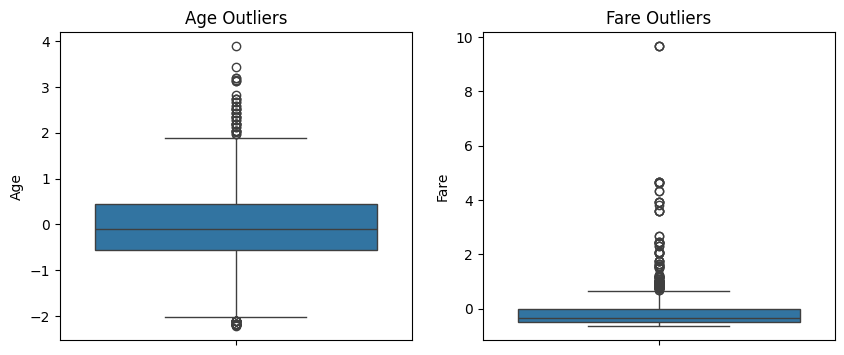

In [ ]:
# Set figure size for plots
plt.figure(figsize=(10, 4))

# Boxplot for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Age Outliers')

# Boxplot for 'Fare'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Fare Outliers')

plt.show()

# **Removing Outliers (Fare feature)**

In [ ]:
# Calculate IQR for 'Fare' to identify outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where 'Fare' is an outlier
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# **Final Cleaned Data Check**

In [ ]:
# Display first 5 rows of cleaned dataset
print(df.head())

# Dataset information after cleaning
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
4                      Allen, Mr. William Henry    0  0.433312      0      0   
5                              Moran, Mr. James    0 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4            373450 -0.486337       False        True  
5            330877 -0